In [1]:
#importing requied packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#loading dataset
data = pd.read_excel("D:/task/day.xlsx")
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    float64
 1   dteday      730 non-null    object 
 2   season      730 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     730 non-null    float64
 6   weekday     730 non-null    float64
 7   workingday  730 non-null    float64
 8   weathersit  730 non-null    float64
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    float64
 14  registered  730 non-null    float64
 15  cnt         730 non-null    float64
dtypes: float64(15), object(1)
memory usage: 91.4+ KB


In [4]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
#renaming columns
data.rename(columns={'instant':'Instant', 'dteday':'Date','season':'Season','yr':'Year','mnth':'Month','holiday':'Holiday', 'weekday':'Weekday',
                     'workingday':'Workingday','weathersit':'Weather','temp':'Temp', 'atemp':'Atemp','hum':'Humidity','windspeed':'Windspeed',
                     'casual':'Casual','registered':'Registered','cnt':'Count'}, inplace=True)

In [6]:
data.head()

,Instant,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1.0,2018-01-01 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-02-01 00:00:00,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,2018-03-01 00:00:00,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,2018-04-01 00:00:00,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,2018-05-01 00:00:00,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [7]:
#checking shape of the data
data.shape


(730, 16)

In [8]:
# we can remove Instant , Date (aleardy month, day, year present in dataset)
#there is no null value
#Count target variable

data1 = data.drop(['Instant','Date','Casual','Registered'],axis=1)
data1.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temp,Atemp,Humidity,Windspeed,Count
0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,985.0
1,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,801.0
2,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,1349.0
3,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,1562.0
4,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,1600.0


In [9]:
#converting into categorical
data1["Season"] = data1["Season"].astype("category") 
data1["Month"] = data1["Month"].astype("category")
data1["Weekday"] = data1["Weekday"].astype("category")
data1["Weather"] = data1["Weather"].astype("category")
data1["Year"] = data1["Year"].astype("category") 
data1["Holiday"] = data1["Holiday"].astype("category")
data1["Workingday"] = data1["Workingday"].astype("category")


#converting into numerical
data1["Temp"] = data1["Temp"].astype("float64") 
data1["Atemp"] = data1["Atemp"].astype("float64")
data1["Humidity"] = data1["Humidity"].astype("float64")
data1["Windspeed"] = data1["Windspeed"].astype("float64")
data1["Count"] = data1["Count"].astype("int64")

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      730 non-null    category
 1   Year        730 non-null    category
 2   Month       730 non-null    category
 3   Holiday     730 non-null    category
 4   Weekday     730 non-null    category
 5   Workingday  730 non-null    category
 6   Weather     730 non-null    category
 7   Temp        730 non-null    float64 
 8   Atemp       730 non-null    float64 
 9   Humidity    730 non-null    float64 
 10  Windspeed   730 non-null    float64 
 11  Count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [10]:
#1st moment business Decision
data1.mean()

C:\Users\Admin\AppData\Local\Temp/ipykernel_1380/3608080933.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.mean()


Temp           20.319259
Atemp          23.726322
Humidity       62.765175
Windspeed      12.763620
Count        4508.006849
dtype: float64

In [11]:
data1.median()

C:\Users\Admin\AppData\Local\Temp/ipykernel_1380/2631600191.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.median()


Temp           20.465826
Atemp          24.368225
Humidity       62.625000
Windspeed      12.125325
Count        4548.500000
dtype: float64

In [12]:
data1.mode()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temp,Atemp,Humidity,Windspeed,Count
0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,10.899153,32.7344,61.3333,7.125450,1096
1,NaN,1.0,3.0,NaN,2.0,NaN,NaN,26.035000,NaN,NaN,7.416900,1162
2,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.959064,1685
3,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.041918,1977
4,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.166739,2077
5,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.042161,2424
6,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.166689,2425
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250104,3068
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.333486,3214
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3351


In [13]:
data1.isnull().sum()

Season        0
Year          0
Month         0
Holiday       0
Weekday       0
Workingday    0
Weather       0
Temp          0
Atemp         0
Humidity      0
Windspeed     0
Count         0
dtype: int64

In [14]:
data1.skew()

C:\Users\Admin\AppData\Local\Temp/ipykernel_1380/2517516131.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


Temp        -0.057187
Atemp       -0.133709
Humidity    -0.067476
Windspeed    0.676314
Count       -0.049581
dtype: float64

In [15]:
#auto eda done using pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(data, explorative=True)
profile.to_file("data_creditanalysis.html")

#import os
#os.getcwd()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp'>

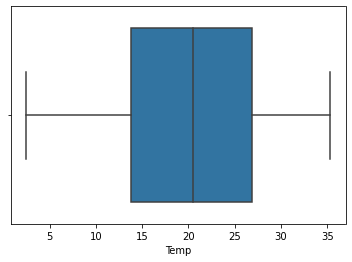

In [16]:
sns.boxplot(data1.Temp)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Atemp'>

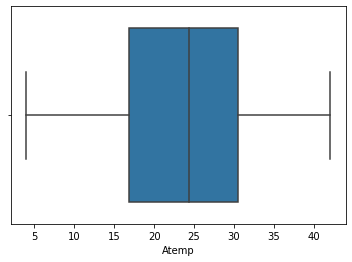

In [17]:
sns.boxplot(data1.Atemp)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

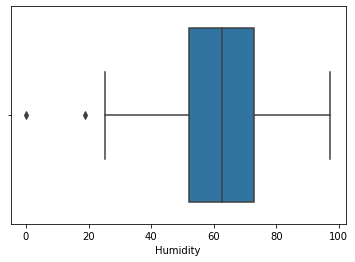

In [18]:
sns.boxplot(data1.Humidity) # there is outlier

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Windspeed'>

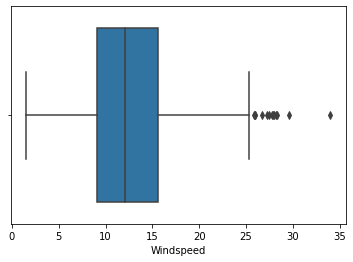

In [19]:
sns.boxplot(data1.Windspeed) # there is oulier

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count'>

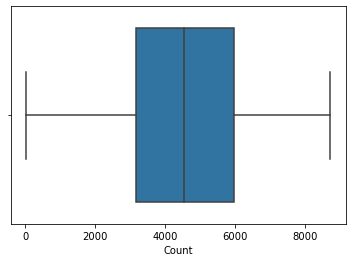

In [20]:
sns.boxplot(data1.Count)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

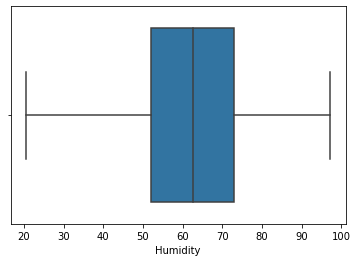

In [21]:
iqr = data1["Humidity"].quantile(0.75) - data1["Humidity"].quantile(0.25)
upper_limit = data1["Humidity"].quantile(0.75) + 1.5*(iqr)
lower_limit = data1["Humidity"].quantile(0.25) - 1.5*(iqr)

data1['Humidity'] = pd.DataFrame(np.where(data1['Humidity'] > upper_limit, upper_limit, np.where(data1['Humidity'] < lower_limit, lower_limit, data1['Humidity'])))
sns.boxplot(data1.Humidity)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Windspeed'>

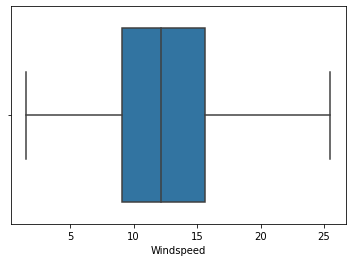

In [22]:
iqr = data1["Windspeed"].quantile(0.75) - data1["Windspeed"].quantile(0.25)
upper_limit = data1["Windspeed"].quantile(0.75) + 1.5*(iqr)
lower_limit = data1["Windspeed"].quantile(0.25) - 1.5*(iqr)

data1['Windspeed'] = pd.DataFrame(np.where(data1['Windspeed'] > upper_limit, upper_limit, np.where(data1['Windspeed'] < lower_limit, lower_limit, data1['Windspeed'])))
sns.boxplot(data1.Windspeed)

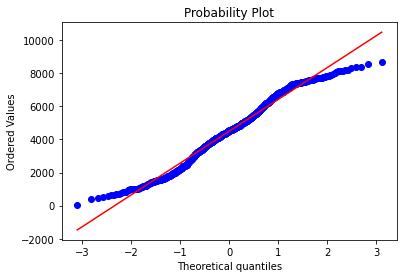

In [23]:
# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(data1.Count, dist = "norm", plot = pylab)
plt.show()

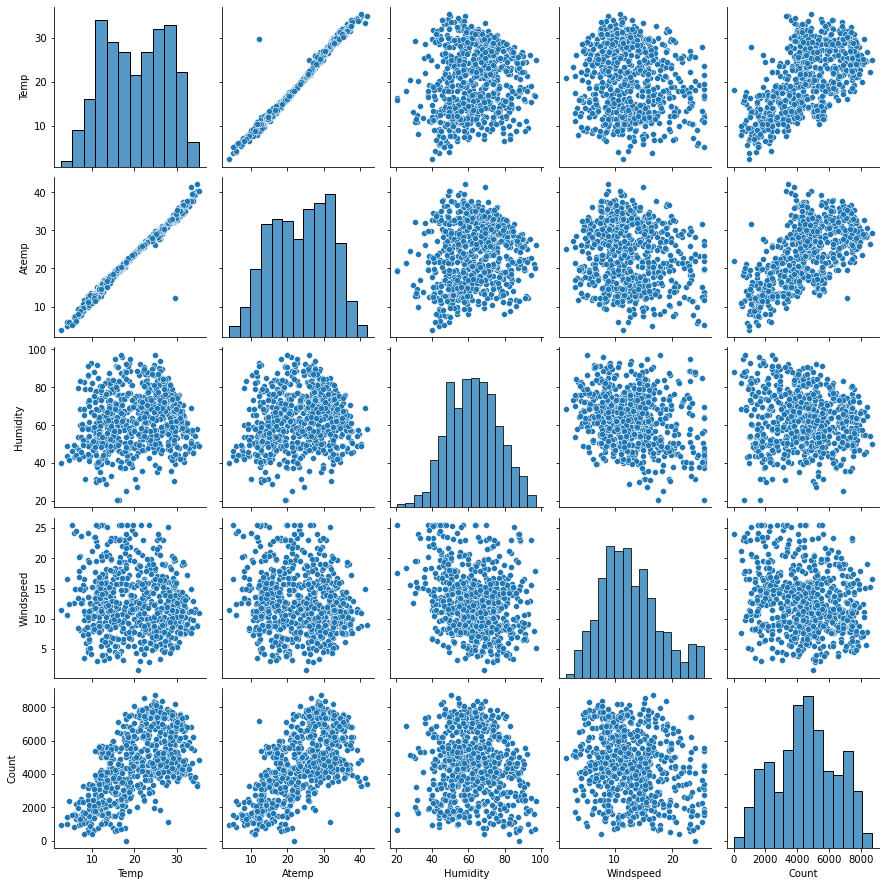

In [24]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(data1)

In [25]:
# Correlation matrix 
data1.corr()

,Temp,Atemp,Humidity,Windspeed,Count
Temp,1.000000,0.991696,0.128332,-0.157152,0.627044
Atemp,0.991696,1.000000,0.141456,-0.183176,0.630685
Humidity,0.128332,0.141456,1.000000,-0.241170,-0.103566
Windspeed,-0.157152,-0.183176,-0.241170,1.000000,-0.234234
Count,0.627044,0.630685,-0.103566,-0.234234,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temp,Atemp,Humidity,Windspeed,Count
0,spring,2018,Jan,No,Tues,Yes,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Wed,Yes,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Thurs,Yes,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Fri,Yes,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Sat,Yes,Good,9.305237,11.46350,43.6957,12.522300,1600


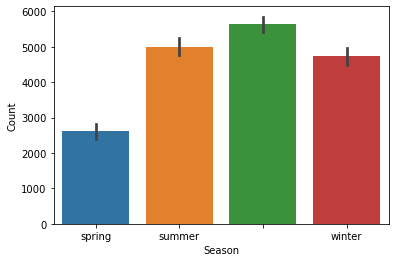

In [26]:
#Mapping Season
data1['Season'] = data1['Season'].map({1:'spring',2:'summer',3:'',4:'winter'}) #Mapping
sns.barplot(data1["Season"],data1["Count"])
##Mapping year
data1['Year'] = data1['Year'].map({0:'2018',1:'2019'}) 
#Mapping Weekday
data1['Weekday'] = data1['Weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
#Mapping Month
data1['Month'] = data1['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
#Mapping Workingday
data1['Workingday'] = data1['Workingday'].map({0:'No',1:'Yes'})
#mapping Weather
data1['Weather'] = data1['Weather'].map({1:"Good",2:'Moderate',3:'Bad'})
#Mapping Holiday no or yes
data1['Holiday'] = data1['Holiday'].map({0:'No',1:'Yes'})


data1.head()

In [28]:
#creating dummy variable
dummy_data = pd.get_dummies(data1,drop_first=True)
dummy_data.head()

,Temp,Atemp,Humidity,Windspeed,Count,Season_summer,Season_,Season_winter,Year_2019,Month_Feb,...,Holiday_Yes,Weekday_Tues,Weekday_Wed,Weekday_Thurs,Weekday_Fri,Weekday_Sat,Weekday_Sun,Workingday_Yes,Weather_Moderate,Weather_Bad
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [29]:
dummy_data.columns

Index(['Temp', 'Atemp', 'Humidity', 'Windspeed', 'Count', 'Season_summer',
       'Season_', 'Season_winter', 'Year_2019', 'Month_Feb', 'Month_Mar',
       'Month_April', 'Month_May', 'Month_June', 'Month_July', 'Month_Aug',
       'Month_Sept', 'Month_Oct', 'Month_Nov', 'Month_Dec', 'Holiday_Yes',
       'Weekday_Tues', 'Weekday_Wed', 'Weekday_Thurs', 'Weekday_Fri',
       'Weekday_Sat', 'Weekday_Sun', 'Workingday_Yes', 'Weather_Moderate',
       'Weather_Bad'],
      dtype='object')

In [30]:
#Normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(dummy_data)
#converint it into dataframe format
norm_data = pd.DataFrame(norm_data)
norm_data.columns=['Temp', 'Atemp', 'Humidity', 'Windspeed', 'Count', 'Season_spring',
       'Season_summer', 'Season_winter', 'Year_2019', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sept', 'Holiday_Yes',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thurs',
       'Weekday_Tues', 'Weekday_Wed', 'Workingday_Yes', 'Weather_Good',
       'Weather_Moderate']
norm_data.describe()
norm_data.columns

Index(['Temp', 'Atemp', 'Humidity', 'Windspeed', 'Count', 'Season_spring',
       'Season_summer', 'Season_winter', 'Year_2019', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sept', 'Holiday_Yes',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thurs',
       'Weekday_Tues', 'Weekday_Wed', 'Workingday_Yes', 'Weather_Good',
       'Weather_Moderate'],
      dtype='object')

In [31]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model

ml1 = smf.ols("Count ~ Atemp+Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate",data =norm_data).fit()

ml1.summary()
# p-values for Atemp, Humidity,Season_winter.Season_Spring, year2019 Month_Aug, Month_June, Month_Mar, Month_Oct, Month_Sept, Weekday_Mon,
# Weekday_Sat, Weekday_Sun, Windspeed, Weekday_Thurs, Weekday_Tues, Weekday_Wed, Workingday_Yes
# are more then 0.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.17e-263
Time:                        16:17:38   Log-Likelihood:                 747.25
No. Observations:                 730   AIC:                            -1434.
Df Residuals:                     700   BIC:                            -1297.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2138      0.022      9.779      0.000       0.171       0.257
Atemp                0.1594      0.129      1.240      0.216      -0.093       0.412
Humidity            -0.1361      0.026     -5.146      0.000      -0.188      -0.084
Windspeed           -0.1160      0.018     -6.592      0.000      -0.151      -0.081
Temp                 0.2544      0.130      1.961      0.050      -0.000       0.509
Season_spring        0.1009      0.021      4.871      0.000       0.060       0.142
Season_summer        0.0954      0.025      3.877      0.000       0.047       0.144
Season_winter        0.1808      0.021      8.648      0.000       0.140       0.222
Year_2019            0.2324      0.007     34.457      0.000       0.219       0.246
Month_Aug            0.0180      0.017      1.081      0.280      -0.015       0.051
Month_Dec            0.0645      0.019      3.375      0.001       0.027       0.102
Month_Feb            0.0562      0.029      1.963      0.050   -1.33e-05       0.112
Month_Jan            0.0887      0.031      2.866      0.004       0.028       0.149
Month_July           0.0646      0.033      1.978      0.048       0.000       0.129
Month_June           0.0094      0.036      0.257      0.797      -0.062       0.081
Month_Mar            0.0562      0.035      1.603      0.109      -0.013       0.125
Month_May            0.1191      0.031      3.884      0.000       0.059       0.179
Month_Nov            0.0627      0.028      2.246      0.025       0.008       0.117
Month_Oct           -0.0103      0.027     -0.386      0.699      -0.063       0.042
Month_Sept          -0.0088      0.021     -0.418      0.676      -0.050       0.033
Holiday_Yes         -0.1065      0.053     -2.028      0.043      -0.210      -0.003
Weekday_Mon          0.0090      0.057      0.157      0.875      -0.104       0.122
Weekday_Sat          0.0063      0.057      0.110      0.913      -0.106       0.118
Weekday_Sun          0.0214      0.057      0.379      0.705      -0.090       0.133
Weekday_Thurs        0.0392      0.057      0.683      0.495      -0.073       0.152
Weekday_Tues         0.0377      0.057      0.658      0.511      -0.075       0.150
Weekday_Wed         -0.0059      0.012     -0.473      0.636      -0.030       0.018
Workingday_Yes      -0.0459      0.057     -0.805      0.421      -0.158       0.066
Weather_Good        -0.0520      0.009     -5.785      0.000      -0.070      -0.034
Weather_Moderate    -0.2213      0.023     -9.627      0.000      -0.266      -0.176
==============================================================================
Omnibus:                      121.699   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.686
Skew:                          -0.854   P

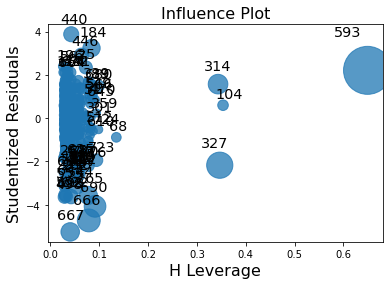

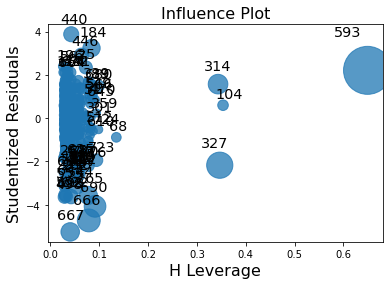

In [32]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)


In [33]:
# Studentized Residuals = Residual/standard deviation of residuals
# index 593 is showing high influence so we can exclude that entire row

norm_data_new = norm_data.drop(norm_data.index[[593]])

In [34]:
# Preparing model                  
ml_new = smf.ols("Count ~ Atemp+Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate",data =norm_data_new).fit()

ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     134.6
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          1.19e-263
Time:                        16:19:34   Log-Likelihood:                 748.25
No. Observations:                 729   AIC:                            -1437.
Df Residuals:                     699   BIC:                            -1299.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2123      0.022      9.733      0.000       0.169       0.255
Atemp                0.5362      0.214      2.511      0.012       0.117       0.955
Humidity            -0.1413      0.026     -5.335      0.000      -0.193      -0.089
Windspeed           -0.1076      0.018     -5.995      0.000      -0.143      -0.072
Temp                -0.1082      0.209     -0.517      0.605      -0.519       0.302
Season_spring        0.0993      0.021      4.805      0.000       0.059       0.140
Season_summer        0.0952      0.025      3.882      0.000       0.047       0.143
Season_winter        0.1794      0.021      8.598      0.000       0.138       0.220
Year_2019            0.2319      0.007     34.457      0.000       0.219       0.245
Month_Aug            0.0167      0.017      1.001      0.317      -0.016       0.049
Month_Dec            0.0641      0.019      3.363      0.001       0.027       0.101
Month_Feb            0.0552      0.029      1.934      0.054      -0.001       0.111
Month_Jan            0.0923      0.031      2.986      0.003       0.032       0.153
Month_July           0.0718      0.033      2.193      0.029       0.008       0.136
Month_June           0.0158      0.036      0.434      0.664      -0.056       0.087
Month_Mar            0.0622      0.035      1.773      0.077      -0.007       0.131
Month_May            0.1250      0.031      4.072      0.000       0.065       0.185
Month_Nov            0.0627      0.028      2.254      0.024       0.008       0.117
Month_Oct           -0.0111      0.027     -0.419      0.675      -0.063       0.041
Month_Sept          -0.0100      0.021     -0.475      0.635      -0.051       0.031
Holiday_Yes         -0.1051      0.052     -2.005      0.045      -0.208      -0.002
Weekday_Mon          0.0103      0.057      0.179      0.858      -0.102       0.123
Weekday_Sat          0.0074      0.057      0.130      0.897      -0.104       0.119
Weekday_Sun          0.0233      0.056      0.412      0.680      -0.088       0.134
Weekday_Thurs        0.0410      0.057      0.717      0.473      -0.071       0.153
Weekday_Tues         0.0400      0.057      0.699      0.485      -0.072       0.152
Weekday_Wed         -0.0070      0.012     -0.569      0.570      -0.031       0.017
Workingday_Yes      -0.0477      0.057     -0.839      0.402      -0.159       0.064
Weather_Good        -0.0502      0.009     -5.588      0.000      -0.068      -0.033
Weather_Moderate    -0.2161      0.023     -9.378      0.000      -0.261      -0.171
==============================================================================
Omnibus:                      125.649   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.886
Skew:                          -0.872   P

In [35]:
#Variance Inflation Factor(VIF)
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables

rsq_Atemp = smf.ols('Atemp~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Atemp = 1/(1 - rsq_Atemp) 

rsq_Humidity = smf.ols('Humidity~Atemp+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Humidity = 1/(1 - rsq_Humidity) 

rsq_Windspeed = smf.ols('Windspeed~Atemp+Humidity+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Windspeed = 1/(1 - rsq_Windspeed) 

rsq_Temp = smf.ols('Temp~Atemp+Humidity+Windspeed+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Temp = 1/(1 - rsq_Temp) 

rsq_Season_spring = smf.ols('Season_spring~Humidity+Windspeed+Temp+Atemp+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Season_spring = 1/(1 - rsq_Season_spring) 

rsq_Season_summer = smf.ols('Season_summer~Humidity+Windspeed+Temp+Atemp+Season_spring+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Season_summer = 1/(1 - rsq_Season_summer) 

rsq_Season_winter = smf.ols('Season_winter~Humidity+Windspeed+Temp+Atemp+Season_spring+Season_summer+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Season_winter = 1/(1 - rsq_Season_winter)

rsq_Year_2019 = smf.ols('Year_2019~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Atemp+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Year_2019 = 1/(1 - rsq_Year_2019)

rsq_Month_Aug = smf.ols('Month_Aug~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Atemp+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_Aug = 1/(1 - rsq_Month_Aug) 

rsq_Month_Dec = smf.ols('Month_Dec~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Atemp+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_Dec = 1/(1 - rsq_Month_Dec) 

rsq_Month_Feb = smf.ols('Month_Feb~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Atemp+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_Feb = 1/(1 - rsq_Month_Feb) 

rsq_Month_Jan = smf.ols('Month_Jan~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Atemp+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_Jan = 1/(1 - rsq_Month_Jan) 

rsq_Month_July = smf.ols('Month_July~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Atemp+Month_Jan+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_July = 1/(1 - rsq_Month_July) 

rsq_Month_June = smf.ols('Month_June~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Atemp+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_June = 1/(1 - rsq_Month_June) 

rsq_Month_Mar = smf.ols('Month_Mar~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Atemp+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_Mar = 1/(1 - rsq_Month_Mar) 

rsq_Month_May = smf.ols('Month_May~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Atemp+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_May = 1/(1 - rsq_Month_May) 

rsq_Month_Nov = smf.ols('Month_Nov~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Atemp+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_Nov = 1/(1 - rsq_Month_Nov) 

rsq_Month_Oct = smf.ols('Month_Oct~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Atemp+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_Oct = 1/(1 - rsq_Month_Oct)

rsq_Month_Sept = smf.ols('Month_Sept~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Atemp+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Month_Sept = 1/(1 - rsq_Month_Sept) 

rsq_Holiday_Yes = smf.ols('Holiday_Yes~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Atemp+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Holiday_Yes = 1/(1 - rsq_Holiday_Yes) 

rsq_Weekday_Mon = smf.ols('Weekday_Mon~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Atemp+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Weekday_Mon = 1/(1 - rsq_Weekday_Mon) 

rsq_Weekday_Sat = smf.ols('Weekday_Sat~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Atemp+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Weekday_Sat = 1/(1 - rsq_Weekday_Sat) 

rsq_Weekday_Sun = smf.ols('Weekday_Sun~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Atemp+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Weekday_Sun = 1/(1 - rsq_Weekday_Sun) 

rsq_Weekday_Thurs = smf.ols('Weekday_Thurs~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Atemp+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Weekday_Thurs = 1/(1 - rsq_Weekday_Thurs)

rsq_Weekday_Tues = smf.ols('Weekday_Tues~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Atemp+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Weekday_Tues = 1/(1 - rsq_Weekday_Tues) 

rsq_Weekday_Wed = smf.ols('Weekday_Wed~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Atemp+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Weekday_Wed = 1/(1 - rsq_Weekday_Wed) 

rsq_Workingday_Yes = smf.ols('Workingday_Yes~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Atemp+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Workingday_Yes = 1/(1 - rsq_Workingday_Yes) 

rsq_Weather_Good = smf.ols('Weather_Good~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Atemp+Weather_Moderate',data =norm_data).fit().rsquared
vif_Weather_Good = 1/(1 - rsq_Weather_Good) 

rsq_Weather_Moderate = smf.ols('Weather_Moderate~Humidity+Windspeed+Temp+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sept+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weekday_Thurs+Weekday_Tues+Weekday_Wed+Workingday_Yes+Weather_Good+Weather_Moderate',data =norm_data).fit().rsquared
vif_Weather_Moderate = 1/(1 - rsq_Weather_Moderate) 


# Storing vif values in a data frame
d1 = {'Variables':['Atemp','Humidity', 'Windspeed', 'Temp', 'Season_spring',
       'Season_summer', 'Season_winter', 'Year_2019', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sept', 'Holiday_Yes',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thurs',
       'Weekday_Tues', 'Weekday_Wed', 'Workingday_Yes', 'Weather_Good',
       'Weather_Moderate'],'VIF':[vif_Atemp, vif_Humidity, vif_Windspeed, vif_Temp,
                                  vif_Season_spring, vif_Season_summer, vif_Season_winter, 
                                  vif_Year_2019, vif_Month_Aug, vif_Month_Dec,vif_Month_Feb,
                                  vif_Month_Jan, vif_Month_July,vif_Month_June,vif_Month_Mar,
                                  vif_Month_May, vif_Month_Nov, vif_Month_Oct, vif_Month_Sept,
                                  vif_Holiday_Yes, vif_Weekday_Mon, vif_Weekday_Sat, vif_Weekday_Sun,
                                  vif_Weekday_Thurs, vif_Weekday_Tues, vif_Weekday_Wed, 
                                  vif_Workingday_Yes, vif_Weather_Good,vif_Weather_Moderate]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


C:\Users\Admin\AppData\Local\Temp/ipykernel_1380/4056888721.py:91: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Weather_Moderate = 1/(1 - rsq_Weather_Moderate)


,Variables,VIF
0,Atemp,70.027360
1,Humidity,2.193363
2,Windspeed,1.277898
3,Temp,81.015893
4,Season_spring,7.493703
5,Season_summer,10.716348
6,Season_winter,7.467652
7,Year_2019,1.053232
8,Month_Aug,1.822802
9,Month_Dec,2.625956


In [36]:
# As Atemp, Temp, Weekday_Mon, Weekday_Sat, Weekday_Sun, Weekday_Thurs, Weekday_Tues, 
# Workingday_Yes   is having highest VIF value, we are going to drop this from 
#the prediction model
# Final model
final_ml = smf.ols("Count ~ Humidity+Windspeed+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weather_Good+Weather_Moderate",data =norm_data).fit()
final_ml.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.05e-248
Time:                        16:27:03   Log-Likelihood:                 690.36
No. Observations:                 730   AIC:                            -1337.
Df Residuals:                     708   BIC:                            -1236.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2681      0.021     12.901      0.000       0.227       0.309
Humidity            -0.0578      0.027     -2.125      0.034      -0.111      -0.004
Windspeed           -0.1104      0.018     -5.982      0.000      -0.147      -0.074
Season_spring        0.1055      0.022      4.883      0.000       0.063       0.148
Season_summer        0.1391      0.024      5.840      0.000       0.092       0.186
Season_winter        0.2199      0.014     16.081      0.000       0.193       0.247
Year_2019            0.2440      0.007     34.163      0.000       0.230       0.258
Month_Aug            0.0448      0.016      2.737      0.006       0.013       0.077
Month_Dec            0.1348      0.017      7.912      0.000       0.101       0.168
Month_Feb            0.1637      0.026      6.345      0.000       0.113       0.214
Month_Jan            0.2490      0.026      9.697      0.000       0.199       0.299
Month_July           0.2639      0.024     11.037      0.000       0.217       0.311
Month_June           0.2166      0.026      8.212      0.000       0.165       0.268
Month_Mar            0.2350      0.026      8.911      0.000       0.183       0.287
Month_May            0.2510      0.022     11.481      0.000       0.208       0.294
Month_Nov            0.1371      0.015      8.918      0.000       0.107       0.167
Holiday_Yes         -0.0532      0.022     -2.445      0.015      -0.096      -0.010
Weekday_Mon         -0.0415      0.010     -3.964      0.000      -0.062      -0.021
Weekday_Sat         -0.0426      0.011     -4.051      0.000      -0.063      -0.022
Weekday_Sun         -0.0231      0.011     -2.162      0.031      -0.044      -0.002
Weather_Good        -0.0711      0.009     -7.559      0.000      -0.090      -0.053
Weather_Moderate    -0.2591      0.024    -10.640      0.000      -0.307      -0.211
==============================================================================
Omnibus:                      107.465   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.000
Skew:                          -0.697   Prob(JB):                     2.00e-75
Kurtosis:                       6.061   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Prediction
pred = final_ml.predict(norm_data)


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


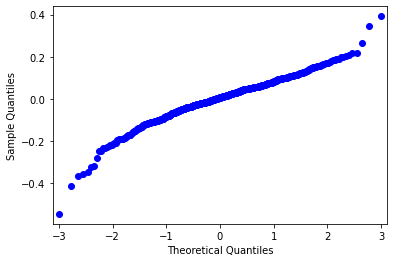

In [38]:
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()


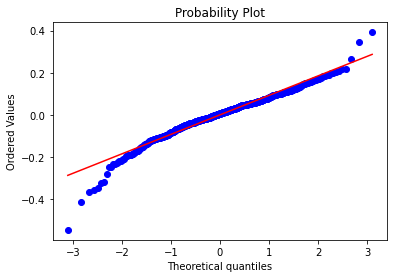

In [39]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

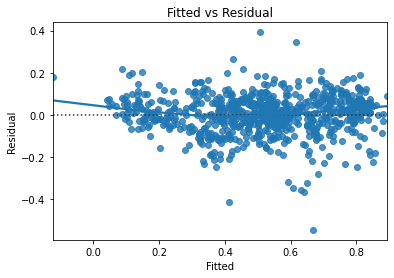

In [40]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = norm_data.Count, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()


In [41]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(norm_data, test_size = 0.2) # 20% test data



model_train = smf.ols("Count ~ Humidity+Windspeed+Season_spring+Season_summer+Season_winter+Year_2019+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_July+Month_June+Month_Mar+Month_May+Month_Nov+Holiday_Yes+Weekday_Mon+Weekday_Sat+Weekday_Sun+Weather_Good+Weather_Moderate",data =x_train).fit()

In [42]:
# prediction on test data set 
test_pred = model_train.predict(x_test)

In [43]:
# test residual values 
test_resid = test_pred - x_test.Count
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.1017682479833914

In [44]:
# train_data prediction
train_pred = model_train.predict(x_train)

In [45]:
# train residual values 
train_resid  = train_pred - x_train.Count
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

0.09245586661281499

In [48]:
final_ml.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.05e-248
Time:                        16:32:43   Log-Likelihood:                 690.36
No. Observations:                 730   AIC:                            -1337.
Df Residuals:                     708   BIC:                            -1236.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2681      0.021     12.901      0.000       0.227       0.309
Humidity            -0.0578      0.027     -2.125      0.034      -0.111      -0.004
Windspeed           -0.1104      0.018     -5.982      0.000      -0.147      -0.074
Season_spring        0.1055      0.022      4.883      0.000       0.063       0.148
Season_summer        0.1391      0.024      5.840      0.000       0.092       0.186
Season_winter        0.2199      0.014     16.081      0.000       0.193       0.247
Year_2019            0.2440      0.007     34.163      0.000       0.230       0.258
Month_Aug            0.0448      0.016      2.737      0.006       0.013       0.077
Month_Dec            0.1348      0.017      7.912      0.000       0.101       0.168
Month_Feb            0.1637      0.026      6.345      0.000       0.113       0.214
Month_Jan            0.2490      0.026      9.697      0.000       0.199       0.299
Month_July           0.2639      0.024     11.037      0.000       0.217       0.311
Month_June           0.2166      0.026      8.212      0.000       0.165       0.268
Month_Mar            0.2350      0.026      8.911      0.000       0.183       0.287
Month_May            0.2510      0.022     11.481      0.000       0.208       0.294
Month_Nov            0.1371      0.015      8.918      0.000       0.107       0.167
Holiday_Yes         -0.0532      0.022     -2.445      0.015      -0.096      -0.010
Weekday_Mon         -0.0415      0.010     -3.964      0.000      -0.062      -0.021
Weekday_Sat         -0.0426      0.011     -4.051      0.000      -0.063      -0.022
Weekday_Sun         -0.0231      0.011     -2.162      0.031      -0.044      -0.002
Weather_Good        -0.0711      0.009     -7.559      0.000      -0.090      -0.053
Weather_Moderate    -0.2591      0.024    -10.640      0.000      -0.307      -0.211
==============================================================================
Omnibus:                      107.465   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.000
Skew:                          -0.697   Prob(JB):                     2.00e-75
Kurtosis:                       6.061   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

"""
We can see that the equation for best fitted line is:

count= 0.2681 - 0.0578 X Humidity - 0.1104 X Windspeed + 0.1055 X Season_spring + 0.1391 X Season_summer 
+ 0.2199 X Season_winter + 0.2440 X Year_2019 + 0.0448 X Month_Aug + 0.1348 X Month_Dec + 0.1637 X Month_Feb 
+ 0.2490 X Month_Jan + 0.2639 X Month_July + 0.2166 X Month_June + 0.2350 X Month_Mar + 0.2510 X Month_May 
+ 0.1371 X Month_Nov - 0.0532 X Holiday_yes - 0.0415 X Weekday_Mon - 0.0426 X Weekday_Sat - 0.0231 X Weekday_Sun 
- 0.0711 X Weather_Good - 0.2591 X Weather_Moderate 


We can see the demand for bikes depends mainly on below variables:
Season_spring , Season_summer , Season_winter, Year_2019, Month_Aug,Month_Dec ,Month_Feb,Month_Jan,Month_June, 
Month_July, Month_Mar, Month_May, Month_Nov,Holiday_yes

8 12 2 1 6 7 3 5 11       1 2 3 5 6 7 8 11 12 
Demands increases in the month of :
Month_Jan, Month_Feb, Month_Mar, Month_May ,Month_Jan, Month_July ,Month_Aug,Month_Nov, Month_Dec


Demand decreases:  if it is holiday , Humidity , Windspeed ,Weekday_Mon, Weekday_Sat, Weekday_Sun
